In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Let $X = \{X_i\}_{i \ge 1}$ be a homogeneous Poisson point process with intensity 1 on $[0, \infty)$. Let $X_0=0$. The following function returns one realization of the Poisson points on the line. It stops after the first $i\in\mathbb{N}$ such that $X_i>n$.

In [2]:
def onePath(n):
    sumExponentialRandomVariables = np.random.exponential(1)
    x = [sumExponentialRandomVariables]
    while sumExponentialRandomVariables <= n:
        delta = np.random.exponential(1)
        sumExponentialRandomVariables += delta
        x.append(sumExponentialRandomVariables)
    #print(max(x))
    return x

Executing the function <code>onePath(n)</code> over some number of paths. For each path $\omega$ the distance to the nearest neighbor
$$Y_i(\omega) := \min\{X_i(\omega)-X_{i-1}(\omega),X_{i+1}(\omega)-X_i(\omega)\}$$
is calculated for each Poisson point. Further, the sum of the power weighted nearest neighbor distances
$$H_n(\omega) := H_{n, \alpha}(\omega) := \frac1{n}\sum_{i\in \{j \in\mathbb{N} : X_j(\omega)\in[0,n]\}} Y_i^\alpha(\omega)$$
is calculated for each realization and stored.

In [3]:
np.random.seed(123)
numberOfPaths = 100000
n = 20
#r = 200
alpha = 2
muAlpha = np.power(0.5,alpha)*math.gamma(alpha+1)
print("Real expectation of Y_1^alpha: " + str(muAlpha))

H = []
X = []
YtoThePowerOfAlpha = []
for i in range(numberOfPaths):
    x = onePath(n)
    numberOfPoissonPoints = len(x)-1
    if numberOfPoissonPoints == 0:
        y = [0]
        H.append(0)
        X.append(x)
        YtoThePowerOfAlpha.append(y)
        continue
    else:
        y = [min(x[0],x[1]-x[0])]
    for j in range(1,numberOfPoissonPoints):
        y.append(min(x[j]-x[j-1],x[j+1]-x[j]))
    ytoThePowerOfAlpha = np.power(y, alpha)
    #print(sum(ytoThePowerOfAlpha)/len(ytoThePowerOfAlpha))
    H.append(sum(ytoThePowerOfAlpha)/n)
    X.append(x)
    YtoThePowerOfAlpha.append(ytoThePowerOfAlpha)

Real expectation of Y_1^alpha: 0.5


Visualization of how the 5 largest values of $H_n$ occured.

Y_i^alpha:
[1.18398028e-02 1.18398028e-02 2.88286464e-02 5.34271846e-02
 9.85666095e+00 2.51599284e+01 2.02287660e+01 9.72096494e-01]


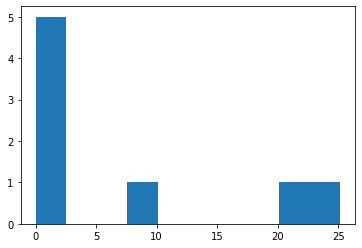

X_i:
[0.12036589537243336, 0.22917675318834352, 0.3989667599772697, 0.6301099722880324, 3.769641935696783, 8.785609279489439, 14.943783534201547, 19.441423576699158, 20.42737311577752]


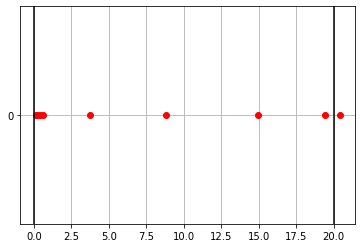

Y_i^alpha:
[6.78565221e-02 6.78565221e-02 4.33316871e-01 4.34279482e-01
 2.12098827e-01 2.12098827e-01 1.59019714e-03 1.59019714e-03
 6.69856499e-01 1.69511089e-01 1.69511089e-01 4.84286195e-02
 4.84286195e-02 1.25444187e-01 2.71216951e+00 4.96620121e+01]


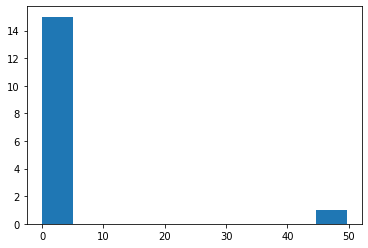

X_i:
[0.45671206201449244, 0.7172049066444501, 1.3754729912824248, 2.1750606292200896, 2.8340594771148644, 3.2946013608866327, 4.036424684170402, 4.0763019601558845, 6.195087523643151, 7.013535138664159, 7.425252382219917, 8.641621575880517, 8.861686610662764, 9.215867619981113, 10.862734194625068, 18.418542840846236, 25.46567077225928]


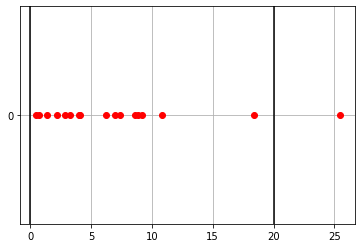

Y_i^alpha:
[ 3.2630579   0.43391834  0.43391834  1.38479435  0.55958815  0.55958815
 28.17052819 15.69068104]


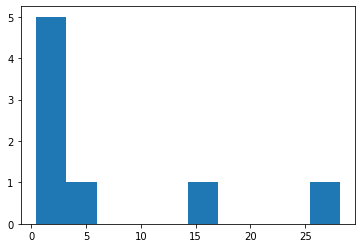

X_i:
[2.4740605155638447, 4.280454132067705, 4.939178913080599, 6.115951767497121, 8.046507166930992, 8.794563412095437, 14.454677692896, 19.762269254785473, 23.723415685189597]


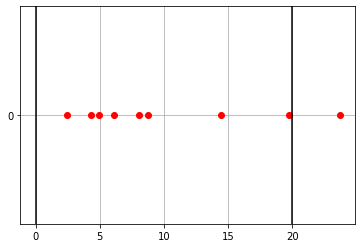

Y_i^alpha:
[ 0.71989784  0.71989784  0.49879772  0.49879772 18.71826423 27.1213463
  1.80328109]


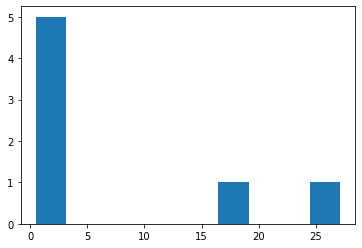

X_i:
[0.8874097547059977, 1.73587769108927, 2.679807772353932, 3.3860639045951277, 7.712524840464063, 12.920340725875167, 18.7044584082464, 20.04732142670712]


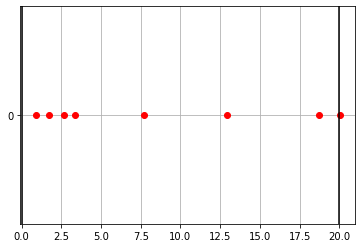

Y_i^alpha:
[ 1.91601043  1.91601043 30.66822924 11.20435356  3.54588345  0.30144856]


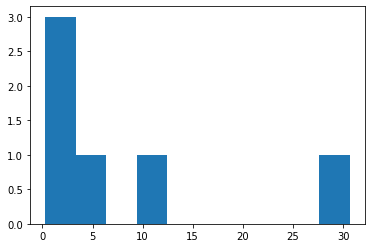

X_i:
[1.7377377482891623, 3.121938032322134, 8.659828356294993, 14.471549921856182, 17.818840402842763, 19.701892033981057, 20.25093534568638]


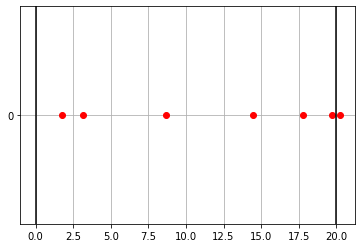

In [4]:
sortedH = sorted(H)
#sortedH = H
#print(sortedH[len(H)-1])
for i in range(5):
    indexH = H.index(sortedH[len(H)-1-i])
    plt.figure(2*i)
    plt.hist(YtoThePowerOfAlpha[indexH])
    print("Y_i^alpha:")
    print(YtoThePowerOfAlpha[indexH])
    plt.show()
    
    plt.figure(2*i+1)
    plt.plot(X[indexH],np.zeros(len(X[indexH])), 'ro')
    plt.grid()
    plt.axvline(x=0, color='k')
    plt.axvline(x=n, color='k')
    plt.yticks(np.arange(0, 1, step=1))
    print("X_i:")
    print(X[indexH])
    plt.show()

#print(sorted(YtoThePowerOfAlpha[indexMaxH]))
#print(X[indexMaxH])